In [2]:
# import modules
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

In [4]:
# use TextFileReader iterable with chunks of 100,000 rows
tp = read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)

In [5]:
crime_data = concat(tp, ignore_index=True)  

# print data's shape
crime_data.shape

(6833221, 22)

In [6]:
#Check basic statistics
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833221 entries, 0 to 6833220
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.0+ GB


In [7]:
#Check first five lines
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3828186,HL140304,01/23/2005 09:40:00 PM,034XX W MONROE ST,1822,NARCOTICS,MANU/DEL:CANNABIS OVER 10 GMS,RESIDENCE,True,False,...,28.0,27.0,18,1153473.0,1899322.0,2005,02/10/2018 03:50:01 PM,41.879581,-87.711933,"(41.879581267, -87.711932887)"
1,3828192,HL135865,01/21/2005 01:17:00 AM,057XX S WESTERN AVE,2022,NARCOTICS,POSS: COCAINE,STREET,True,False,...,16.0,63.0,18,1161349.0,1866617.0,2005,02/10/2018 03:50:01 PM,41.789675,-87.683921,"(41.789675, -87.683921221)"
2,3828195,HL134097,01/20/2005 01:30:00 AM,052XX W DIVISION ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,37.0,25.0,18,1141394.0,1907496.0,2005,02/10/2018 03:50:01 PM,41.902243,-87.756084,"(41.902243139, -87.756083772)"
3,3828199,HL193598,02/21/2005 11:00:00 AM,055XX S HYDE PARK BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,5.0,41.0,08B,1188601.0,1868603.0,2005,02/10/2018 03:50:01 PM,41.794516,-87.583934,"(41.794516399, -87.583933877)"
4,3828202,HL196067,02/22/2005 04:30:00 PM,003XX E GARFIELD BLVD,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,False,False,...,3.0,40.0,26,1179640.0,1868628.0,2005,02/10/2018 03:50:01 PM,41.794795,-87.616793,"(41.794794662, -87.61679251)"


### Exploratory Data Analysis

C:\Users\arindagh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

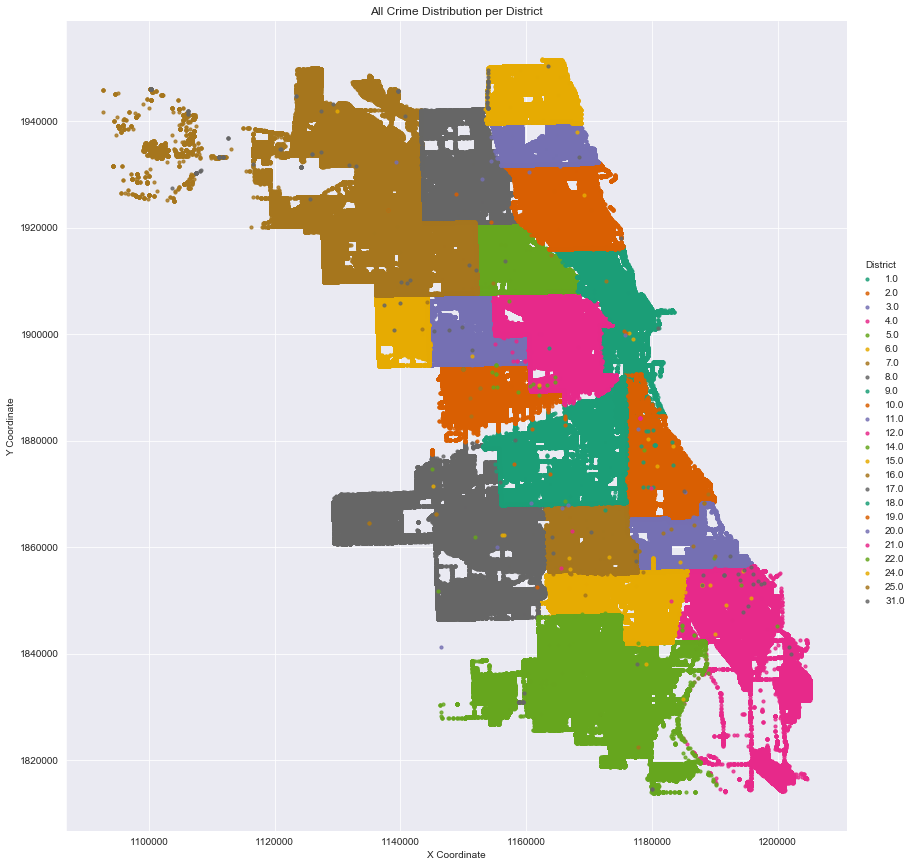

In [8]:
# Created a scatter plot of X and Y coordinates vs all crime data available in the dataset

crime_data = crime_data.loc[(crime_data['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

In [9]:
# create and preview dataframe containing crimes associated with gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
0,01/23/2005 09:40:00 PM,NARCOTICS,True,False,11.0,1153473.0,1899322.0
1,01/21/2005 01:17:00 AM,NARCOTICS,True,False,8.0,1161349.0,1866617.0
2,01/20/2005 01:30:00 AM,NARCOTICS,True,False,15.0,1141394.0,1907496.0
6,01/19/2005 01:40:00 PM,NARCOTICS,True,False,7.0,1170295.0,1866721.0
10,01/20/2005 09:36:28 PM,NARCOTICS,True,False,6.0,1172976.0,1853544.0


C:\Users\arindagh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


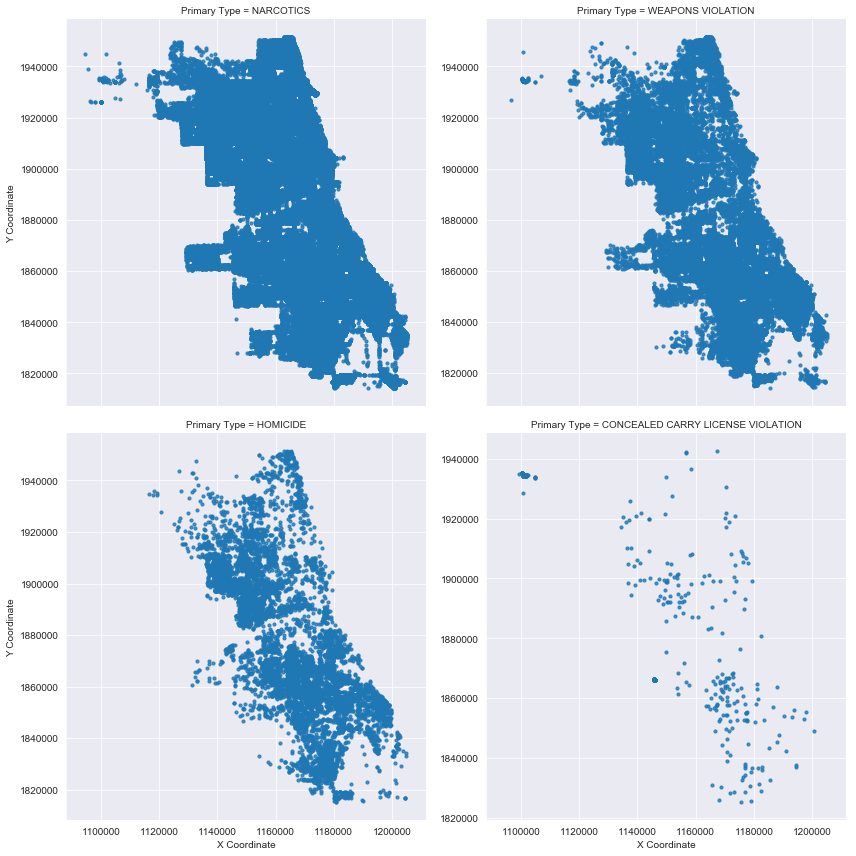

In [10]:
# geographical distribution scatter plots by crime
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

In [11]:
#Data Cleaning and extractions

# drop null values and confirm

crime_data = crime_data.dropna()
crime_data.isnull().sum().sum()

0

In [12]:
# create a list of columns to keep and update the dataframe with new columns

keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

crime_data = crime_data[keep_cols].reset_index()
crime_data.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,0,2005,01/23/2005 09:40:00 PM,NARCOTICS,True,False,11.0,RESIDENCE,18,1153473.0,1899322.0,41.879581,-87.711933,"(41.879581267, -87.711932887)"
1,1,2005,01/21/2005 01:17:00 AM,NARCOTICS,True,False,8.0,STREET,18,1161349.0,1866617.0,41.789675,-87.683921,"(41.789675, -87.683921221)"
2,2,2005,01/20/2005 01:30:00 AM,NARCOTICS,True,False,15.0,STREET,18,1141394.0,1907496.0,41.902243,-87.756084,"(41.902243139, -87.756083772)"
3,3,2005,02/21/2005 11:00:00 AM,BATTERY,False,True,2.0,RESIDENCE,08B,1188601.0,1868603.0,41.794516,-87.583934,"(41.794516399, -87.583933877)"
4,4,2005,02/22/2005 04:30:00 PM,CRIMINAL TRESPASS,False,False,2.0,GAS STATION,26,1179640.0,1868628.0,41.794795,-87.616793,"(41.794794662, -87.61679251)"


In [13]:
# change string Date to datetime.datetime format

crime_data['Date'] = crime_data['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
crime_data.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,0,2005,2005-01-23 21:40:00,NARCOTICS,True,False,11.0,RESIDENCE,18,1153473.0,1899322.0,41.879581,-87.711933,"(41.879581267, -87.711932887)"
1,1,2005,2005-01-21 01:17:00,NARCOTICS,True,False,8.0,STREET,18,1161349.0,1866617.0,41.789675,-87.683921,"(41.789675, -87.683921221)"
2,2,2005,2005-01-20 01:30:00,NARCOTICS,True,False,15.0,STREET,18,1141394.0,1907496.0,41.902243,-87.756084,"(41.902243139, -87.756083772)"
3,3,2005,2005-02-21 11:00:00,BATTERY,False,True,2.0,RESIDENCE,08B,1188601.0,1868603.0,41.794516,-87.583934,"(41.794516399, -87.583933877)"
4,4,2005,2005-02-22 16:30:00,CRIMINAL TRESPASS,False,False,2.0,GAS STATION,26,1179640.0,1868628.0,41.794795,-87.616793,"(41.794794662, -87.61679251)"


In [148]:
crime=crime_data[['District','Latitude','Longitude']]
crime_df=crime.groupby('District').first().reset_index()
crime_df

,District,Latitude,Longitude
0,1.0,41.881734,-87.642060
1,2.0,41.796676,-87.604013
2,3.0,41.761679,-87.558443
3,4.0,41.733539,-87.547156
4,5.0,41.714665,-87.603831
5,6.0,41.752062,-87.607828
6,7.0,41.765054,-87.641686
7,8.0,41.777017,-87.686172
8,9.0,41.827274,-87.668953
9,10.0,41.863026,-87.709501


In [14]:
# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

crime_data['Year'] = crime_data['Date'].dt.year
crime_data['Month'] = crime_data['Date'].dt.month
crime_data['Day'] = crime_data['Date'].dt.day
crime_data['Weekday'] = crime_data['Date'].dt.dayofweek
crime_data['HourOfDay'] = crime_data['Date'].dt.hour

crime_data = crime_data.sort_values('Date')
# print columns list and info

crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159820 entries, 1927526 to 5054183
Data columns (total 18 columns):
index                   int64
Year                    int64
Date                    datetime64[ns]
Primary Type            object
Arrest                  bool
Domestic                bool
District                float64
Location Description    object
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Latitude                float64
Longitude               float64
Location                object
Month                   int64
Day                     int64
Weekday                 int64
HourOfDay               int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(4)
memory usage: 810.7+ MB


Text(0.5, 1.0, 'CHICAGO CRIME RATES: 2001 - 2018')

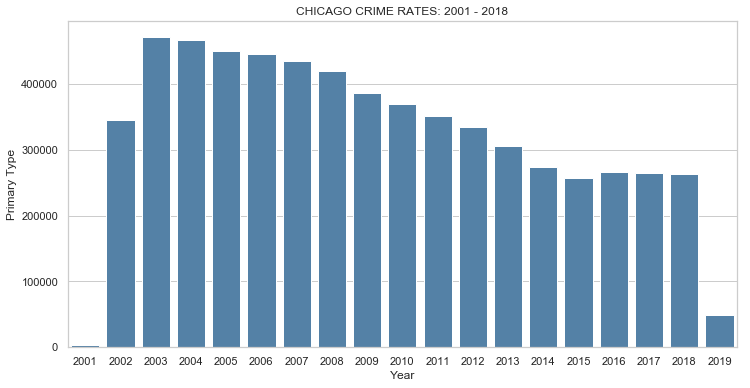

In [57]:
# plot bar chart of Crime rates for all years
plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='Primary Type',
            data=crime_data.groupby('Year')[['Primary Type']].count().reset_index(),
            color='steelblue').\
            set_title("CHICAGO CRIME RATES: 2001 - 2018")

Text(0.5, 1.0, 'CHICAGO CRIME RATES: 2001 - 2018')

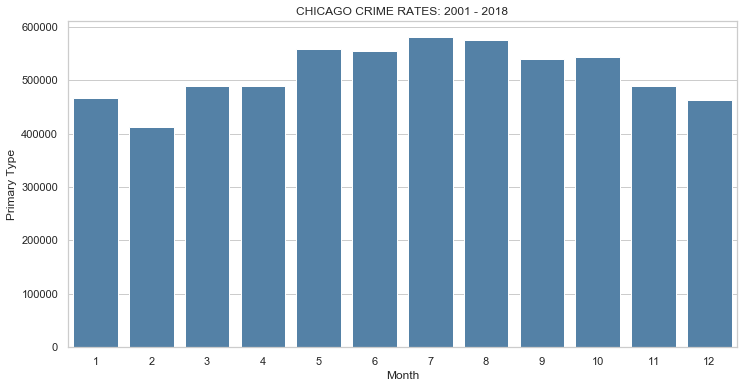

In [59]:
# plot bar chart of Crime rates for all Months
plt.figure(figsize=(12,6))
sns.barplot(x='Month',
            y='Primary Type',
            data=crime_data.groupby('Month')[['Primary Type']].count().reset_index(),
            color='steelblue').\
            set_title("CHICAGO CRIME RATES: 2001 - 2018")

Text(0.5, 1.0, 'CHICAGO CRIME RATES: 2001 - 2018')

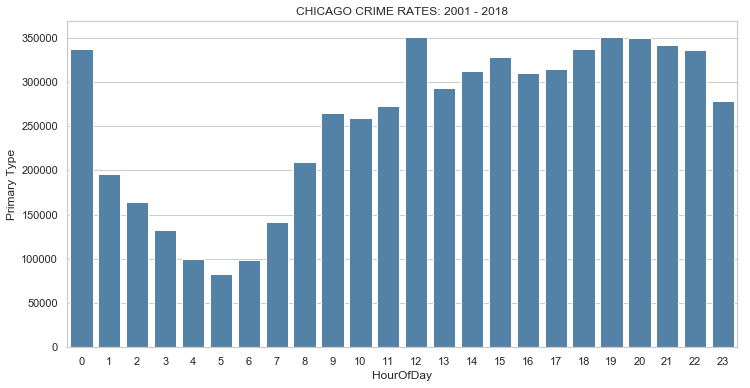

In [60]:
# plot bar chart of Crime rates for all years
plt.figure(figsize=(12,6))
sns.barplot(x='HourOfDay',
            y='Primary Type',
            data=crime_data.groupby('HourOfDay')[['Primary Type']].count().reset_index(),
            color='steelblue').\
            set_title("CHICAGO CRIME RATES: 2001 - 2018")

In [78]:
# visualize the "scene of the crime" vs. number of occurences at such scene
crime_scene = crime_data.groupby('Location Description')[['Primary Type']].count().sort_values('Primary Type',ascending=False).reset_index().head(10)
            
    
# Top Homicide Crime Scene Locations
crime_scene.head(10)

,Location Description,Primary Type
0,STREET,1588908
1,RESIDENCE,1022956
2,APARTMENT,667050
3,SIDEWALK,629997
4,OTHER,229514
5,PARKING LOT/GARAGE(NON.RESID.),174959
6,ALLEY,138147
7,"SCHOOL, PUBLIC, BUILDING",128676
8,RESIDENCE-GARAGE,119166
9,SMALL RETAIL STORE,111330


C:\Users\arindagh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\arindagh\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CRIME SCENE BY LOCATION FREQUENCY')

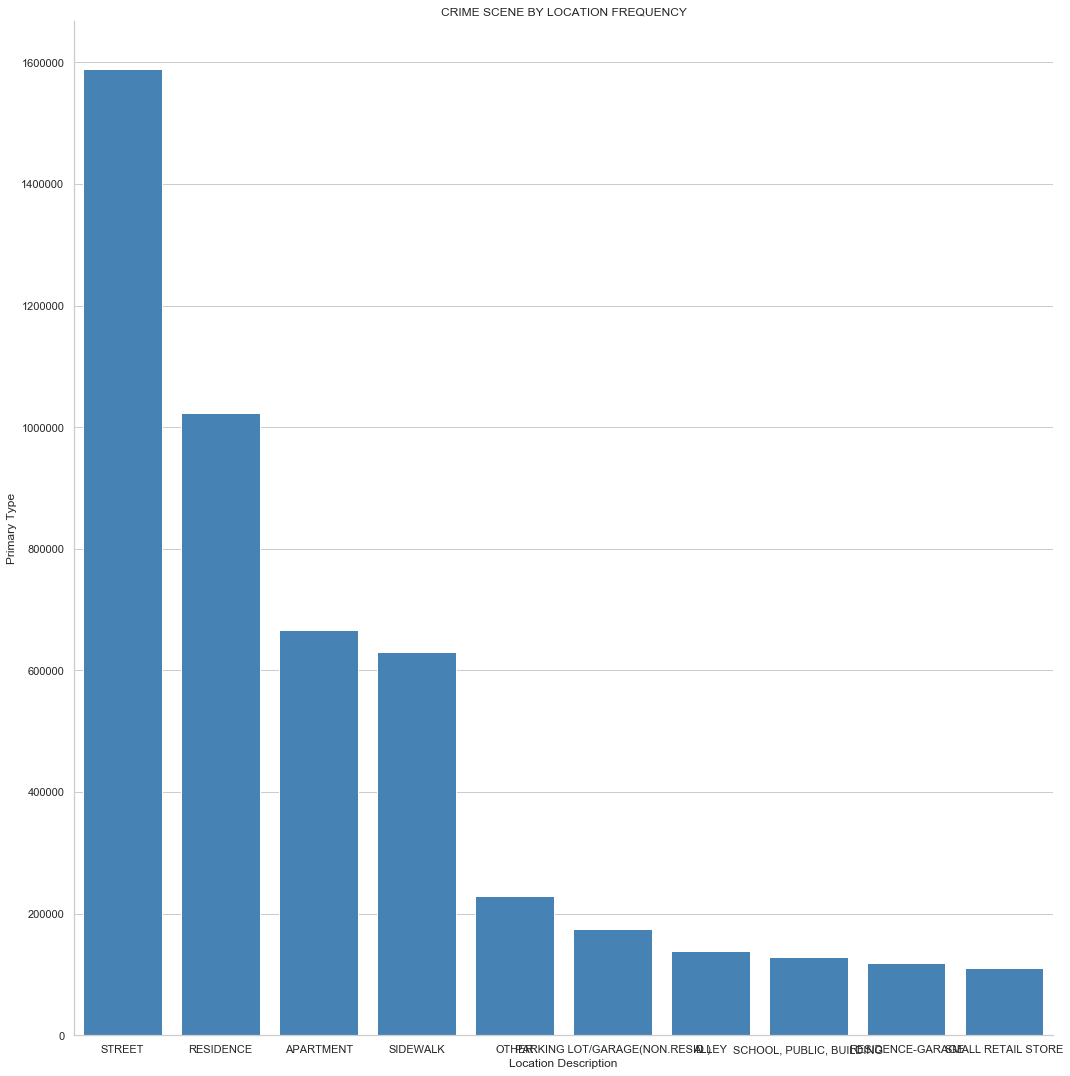

In [96]:
# create a count plot for all crime scene location
sg = sns.factorplot(x='Location Description',
                   y='Primary Type',
                   data=crime_scene,
                   kind='bar',
                   size=15,
                   color='steelblue', 
                   saturation=20)
g.fig.set_size_inches(35,10)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

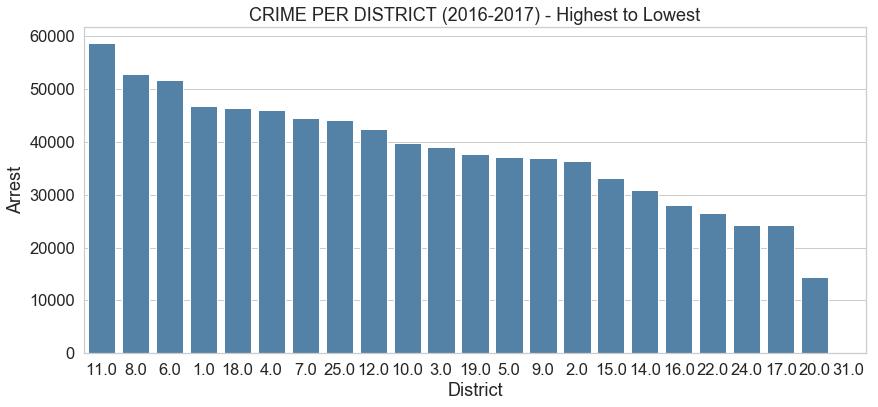

In [85]:
#Most and the least dangerous Police districts in recent Year
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = crime_data[crime_data['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('CRIME PER DISTRICT (2016-2017) - Highest to Lowest')

Text(0.5, 1.0, 'HOMICIDE - ARRESTS STATS BY YEAR')

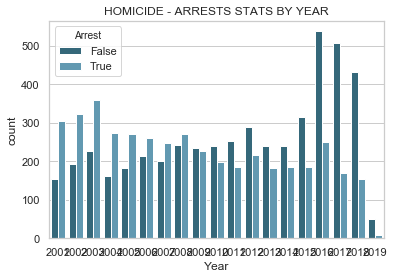

In [90]:
# create seaborn countplots  for whole datasetfig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Arrest']]
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df_arrest,
                   palette="PuBuGn_d")
plt.title('HOMICIDE - ARRESTS STATS BY YEAR')

C:\Users\arindagh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


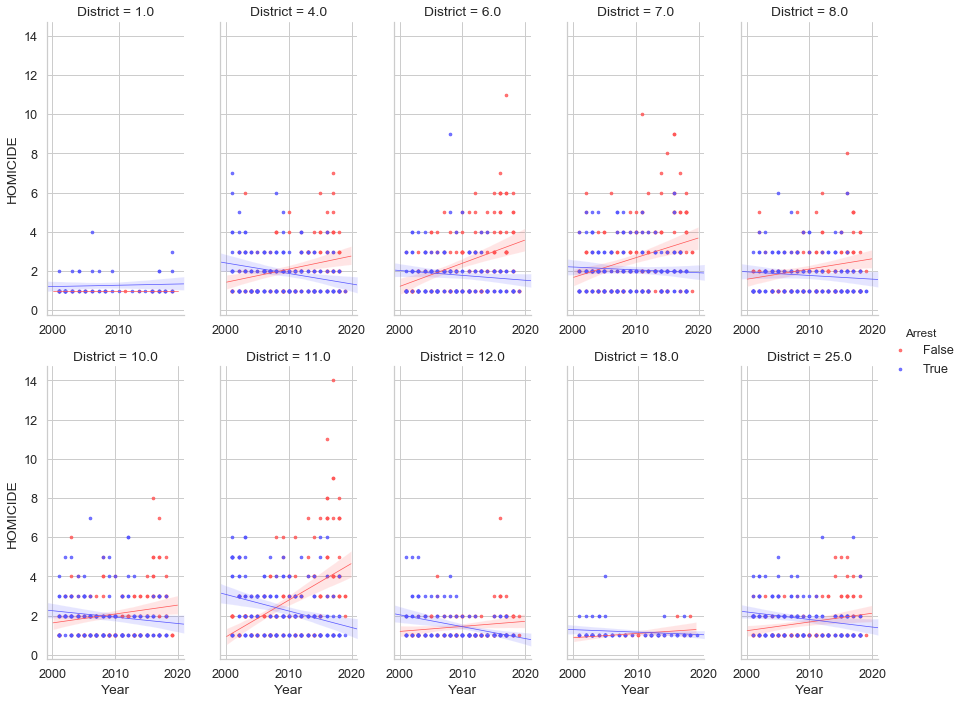

In [89]:
# create seaborn lmplot to compare arrest rates for different districts
dfx = crime_data[crime_data['District'].\
                isin(list(sorted_homicides.head(10)['District']))].\
                groupby(['District','Year','Month','Arrest'])['Primary Type'].\
                value_counts().unstack().reset_index()
with sns.plotting_context('notebook',font_scale=1.25):
    sns.set_context("notebook", font_scale=1.15)    
    g = sns.lmplot('Year','HOMICIDE',
                   col='District',
                   col_wrap=5,
                   size=5,
                   aspect=0.5,
                   sharex=False,
                   data=dfx[:],
                   fit_reg=True,
                   hue="Arrest", 
                   palette=sns.color_palette("seismic_r", 2),
                   scatter_kws={"marker": "o",
                            "s": 7},
                   line_kws={"lw":0.7})

### Clustering Analysis

In [102]:
import requests
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

In [99]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159820 entries, 1927526 to 5054183
Data columns (total 18 columns):
index                   int64
Year                    int64
Date                    datetime64[ns]
Primary Type            object
Arrest                  bool
Domestic                bool
District                float64
Location Description    object
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Latitude                float64
Longitude               float64
Location                object
Month                   int64
Day                     int64
Weekday                 int64
HourOfDay               int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(4)
memory usage: 970.7+ MB


In [101]:
#Exploring the district with the highest crime
crime_latitude = crime_data.loc[0, 'Latitude'] # neighborhood latitude value
crime_longitude = crime_data.loc[0, 'Longitude'] # neighborhood longitude value
crime_district = crime_data.loc[0, 'District']
print('Latitude and longitude values of {} are {}, {}.'.format(crime_district, 
                                                               crime_latitude, 
                                                               crime_longitude))

Latitude and longitude values of 11.0 are 41.879581267, -87.711932887.


In [138]:
radius = 500
LIMIT=100
CLIENT_ID='QGWPQQNZH2ZN3JQMLE5SO0S55CTPFBWRIA4JBRSOBE5HO53K'
CLIENT_SECRET='25SYV1WAA5QIUM1NZ5T4UJGMDE3WIPKL0G0YBACD4NWASC1L'
VERSION = '20180605'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    crime_latitude, 
    crime_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QGWPQQNZH2ZN3JQMLE5SO0S55CTPFBWRIA4JBRSOBE5HO53K&client_secret=25SYV1WAA5QIUM1NZ5T4UJGMDE3WIPKL0G0YBACD4NWASC1L&v=20180605&ll=41.879581267,-87.711932887&radius=500&limit=100'

In [139]:
results = requests.get(url).json()
results

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5d767031492822002d67b152'},
 'response': {}}

In [107]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [108]:
import json
import requests # library to handle requests
from pandas.io.json import json_normalize 

In [122]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Garfield Park,Park,41.882694,-87.715380
1,Homan and Madison,Intersection,41.880900,-87.710930
2,Roseland Liquor Store,Food,41.881948,-87.711188
3,Fort Washington,Vacation Rental,41.882990,-87.709581
4,Urbane Football Forum,Football Stadium,41.875630,-87.709900
5,Garfield Park Fieldhouse,Trail,41.882736,-87.715816
6,Chicago Transit Authority,Bus Station,41.875590,-87.709800


In [110]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


In [155]:
#Repeat same process for all the neighborhood

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [157]:
crime_venues = getNearbyVenues(names=crime_df['District'],
                                   latitudes=crime_df['Latitude'],
                                   longitudes=crime_df['Longitude']
                                  )

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
24.0
25.0
31.0


In [152]:
print('There are {} uniques categories.'.format(len(crime_venues['Venue Category'].unique())))

There are 166 uniques categories.


In [158]:
# one hot encoding
crime_onehot = pd.get_dummies(crime_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
crime_onehot['District'] = crime_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [crime_onehot.columns[-1]] + list(crime_onehot.columns[:-1])
crime_onehot = crime_onehot[fixed_columns]

crime_onehot.head(10)

,District,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
crime_onehot.shape

(646, 167)

In [160]:
crime_grouped = crime_onehot.groupby('District').mean().reset_index()
crime_grouped

,District,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,1.0,0.000000,0.010989,0.000000,0.010989,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010989,0.010989,0.000000,0.000000,0.021978,0.000000,0.010989,0.000000,0.000000,0.000000
1,2.0,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6.0,0.090909,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [162]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in crime_grouped['District']:
   
    temp = crime_grouped[crime_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

                     venue  freq
0           Sandwich Place  0.09
1  New American Restaurant  0.07
2              Coffee Shop  0.05
3               Food Truck  0.04
4            Grocery Store  0.04


           venue  freq
0    Coffee Shop  0.15
1    Bus Station  0.08
2    Pizza Place  0.08
3        Stadium  0.08
4  Grocery Store  0.08


               venue  freq
0  Currency Exchange  0.25
1     Sandwich Place  0.12
2      Movie Theater  0.12
3     Breakfast Spot  0.12
4               Park  0.12


                venue  freq
0  Mexican Restaurant  0.36
1   Convenience Store  0.18
2       Grocery Store  0.18
3      Discount Store  0.09
4                 Gym  0.09


                  venue  freq
0  Fast Food Restaurant  0.50
1      Department Store  0.25
2   Fried Chicken Joint  0.25
3             Pet Store  0.00
4           Opera House  0.00


                 venue  freq
0  Fried Chicken Joint  0.14
1   African Restaurant  0.09
2                  Spa  0.09
3               Lounge  0.09

In [163]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [172]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = crime_grouped['District']

for ind in np.arange(crime_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(crime_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,Sandwich Place,New American Restaurant,Coffee Shop,Grocery Store,Food Truck,Snack Place,Mediterranean Restaurant,Pizza Place,Theater,Cocktail Bar
1,2.0,Coffee Shop,Bubble Tea Shop,Bowling Alley,Theater,Baseball Field,Bus Station,Grocery Store,Pastry Shop,Art Museum,Stadium
2,3.0,Currency Exchange,Train Station,Sandwich Place,Park,Movie Theater,Gym,Breakfast Spot,Health & Beauty Service,Flower Shop,Falafel Restaurant
3,4.0,Mexican Restaurant,Convenience Store,Grocery Store,Bakery,Discount Store,Gym,Ethiopian Restaurant,Food,Flower Shop,Fast Food Restaurant
4,5.0,Fast Food Restaurant,Department Store,Fried Chicken Joint,Yoga Studio,Ethiopian Restaurant,Food Stand,Food,Flower Shop,Falafel Restaurant,Eye Doctor
5,6.0,Fried Chicken Joint,African Restaurant,Lounge,Spa,Diner,Dry Cleaner,Cosmetics Shop,Food,Chinese Restaurant,Home Service
6,7.0,Fast Food Restaurant,Park,Laundromat,Intersection,Yoga Studio,Food,Flower Shop,Falafel Restaurant,Eye Doctor,Event Space
7,8.0,Mexican Restaurant,Fast Food Restaurant,Discount Store,Ice Cream Shop,Breakfast Spot,Hobby Shop,Lounge,Gas Station,Fried Chicken Joint,Pizza Place
8,9.0,Mexican Restaurant,Donut Shop,Flower Shop,Sandwich Place,Pub,Gas Station,Bike Rental / Bike Share,Grocery Store,Ethiopian Restaurant,Fast Food Restaurant
9,10.0,Fast Food Restaurant,Bank,Cosmetics Shop,Movie Theater,Liquor Store,Theater,Shoe Store,Bus Station,Hot Dog Joint,Intersection


### Clustering Neighborhoods

In [173]:
# set number of clusters
kclusters = 5

crime_grouped_clustering = crime_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(crime_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 4, 2, 1, 2, 1, 4, 1])

In [174]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

crime_merged = crime_df

# merge data to add latitude/longitude for each neighborhood
crime_merged = crime_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District')

crime_merged.head(10) # check the last columns!

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,41.881734,-87.642060,1,Sandwich Place,New American Restaurant,Coffee Shop,Grocery Store,Food Truck,Snack Place,Mediterranean Restaurant,Pizza Place,Theater,Cocktail Bar
1,2.0,41.796676,-87.604013,1,Coffee Shop,Bubble Tea Shop,Bowling Alley,Theater,Baseball Field,Bus Station,Grocery Store,Pastry Shop,Art Museum,Stadium
2,3.0,41.761679,-87.558443,1,Currency Exchange,Train Station,Sandwich Place,Park,Movie Theater,Gym,Breakfast Spot,Health & Beauty Service,Flower Shop,Falafel Restaurant
3,4.0,41.733539,-87.547156,4,Mexican Restaurant,Convenience Store,Grocery Store,Bakery,Discount Store,Gym,Ethiopian Restaurant,Food,Flower Shop,Fast Food Restaurant
4,5.0,41.714665,-87.603831,2,Fast Food Restaurant,Department Store,Fried Chicken Joint,Yoga Studio,Ethiopian Restaurant,Food Stand,Food,Flower Shop,Falafel Restaurant,Eye Doctor
5,6.0,41.752062,-87.607828,1,Fried Chicken Joint,African Restaurant,Lounge,Spa,Diner,Dry Cleaner,Cosmetics Shop,Food,Chinese Restaurant,Home Service
6,7.0,41.765054,-87.641686,2,Fast Food Restaurant,Park,Laundromat,Intersection,Yoga Studio,Food,Flower Shop,Falafel Restaurant,Eye Doctor,Event Space
7,8.0,41.777017,-87.686172,1,Mexican Restaurant,Fast Food Restaurant,Discount Store,Ice Cream Shop,Breakfast Spot,Hobby Shop,Lounge,Gas Station,Fried Chicken Joint,Pizza Place
8,9.0,41.827274,-87.668953,4,Mexican Restaurant,Donut Shop,Flower Shop,Sandwich Place,Pub,Gas Station,Bike Rental / Bike Share,Grocery Store,Ethiopian Restaurant,Fast Food Restaurant
9,10.0,41.863026,-87.709501,1,Fast Food Restaurant,Bank,Cosmetics Shop,Movie Theater,Liquor Store,Theater,Shoe Store,Bus Station,Hot Dog Joint,Intersection


In [176]:
#Create a map of the Clusters

map_clusters = folium.Map(location=['43.65','-87.65'], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(crime_merged['Latitude'], crime_merged['Longitude'], crime_merged['District'], crime_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining the Clusters

In [177]:
crime_merged.loc[crime_merged['Cluster Labels'] == 0, crime_merged.columns[[1] + list(range(5, crime_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,41.877036,Discount Store,Convenience Store,Social Club,Baseball Field,Yoga Studio,Event Space,Food,Flower Shop,Fast Food Restaurant


In [178]:
crime_merged.loc[crime_merged['Cluster Labels'] == 1, crime_merged.columns[[1] + list(range(5, crime_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,41.881734,New American Restaurant,Coffee Shop,Grocery Store,Food Truck,Snack Place,Mediterranean Restaurant,Pizza Place,Theater,Cocktail Bar
1,41.796676,Bubble Tea Shop,Bowling Alley,Theater,Baseball Field,Bus Station,Grocery Store,Pastry Shop,Art Museum,Stadium
2,41.761679,Train Station,Sandwich Place,Park,Movie Theater,Gym,Breakfast Spot,Health & Beauty Service,Flower Shop,Falafel Restaurant
5,41.752062,African Restaurant,Lounge,Spa,Diner,Dry Cleaner,Cosmetics Shop,Food,Chinese Restaurant,Home Service
7,41.777017,Fast Food Restaurant,Discount Store,Ice Cream Shop,Breakfast Spot,Hobby Shop,Lounge,Gas Station,Fried Chicken Joint,Pizza Place
9,41.863026,Bank,Cosmetics Shop,Movie Theater,Liquor Store,Theater,Shoe Store,Bus Station,Hot Dog Joint,Intersection
11,41.879259,Café,Coffee Shop,Spa,Bar,Sandwich Place,Pizza Place,Gym / Fitness Center,Grocery Store,Dance Studio
12,41.911843,Chinese Restaurant,Deli / Bodega,Trail,Burger Joint,Food Truck,Fast Food Restaurant,Sushi Restaurant,Bar,Bakery
14,41.986663,Pizza Place,Dive Bar,Pub,Sushi Restaurant,Event Space,Eastern European Restaurant,Spa,Bank,Deli / Bodega
15,41.953708,Bar,Liquor Store,Sandwich Place,Fast Food Restaurant,Burger Joint,Skating Rink,Mexican Restaurant,Chinese Restaurant,Fried Chicken Joint


In [179]:
crime_merged.loc[crime_merged['Cluster Labels'] == 2, crime_merged.columns[[1] + list(range(5, crime_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,41.714665,Department Store,Fried Chicken Joint,Yoga Studio,Ethiopian Restaurant,Food Stand,Food,Flower Shop,Falafel Restaurant,Eye Doctor
6,41.765054,Park,Laundromat,Intersection,Yoga Studio,Food,Flower Shop,Falafel Restaurant,Eye Doctor,Event Space


In [180]:
crime_merged.loc[crime_merged['Cluster Labels'] == 3, crime_merged.columns[[1] + list(range(5, crime_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,41.837901,Eye Doctor,Coffee Shop,Gym / Fitness Center,Park,Yoga Studio,Electronics Store,Flower Shop,Fast Food Restaurant,Falafel Restaurant


In [181]:
crime_merged.loc[crime_merged['Cluster Labels'] == 4, crime_merged.columns[[1] + list(range(5, crime_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,41.733539,Convenience Store,Grocery Store,Bakery,Discount Store,Gym,Ethiopian Restaurant,Food,Flower Shop,Fast Food Restaurant
8,41.827274,Donut Shop,Flower Shop,Sandwich Place,Pub,Gas Station,Bike Rental / Bike Share,Grocery Store,Ethiopian Restaurant,Fast Food Restaurant
13,41.878582,Fried Chicken Joint,Seafood Restaurant,Mexican Restaurant,Golf Course,Park,Auto Garage,Grocery Store,Dog Run,Donut Shop
21,42.011789,Chinese Restaurant,Sandwich Place,Pizza Place,Bus Station,Breakfast Spot,Bus Stop,Convenience Store,Bakery,Grocery Store
22,41.920277,Donut Shop,Ice Cream Shop,Bus Station,Park,Pizza Place,Discount Store,Sandwich Place,Coffee Shop,Chinese Restaurant
